# Problem 7.8

(i) In order to find the inverse we need to solve for $x$. Let $F(x) = y$
\begin{equation}
y = 1-e^{-\lambda x} \implies 1-y = e^{-\lambda x}\implies
\end{equation}
\begin{equation}
\ln(1 - y) = -\lambda x \implies -\frac{\ln(1 - y)}{\lambda} = x
\end{equation}
Which gives the result that
\begin{equation}
F^{-1}(y) =-\frac{\ln(1 - y)}{\lambda}
\end{equation}
(ii) Assume that $Y\sim \mbox{uniform}(0,1)$ Then $Y$ has a continuous c.d.f. then $X = F(Y-1)\sim \mbox{uniform}(0,1)$ is a uniform distribution by the Universality of the Uniform.

(iii) (below)

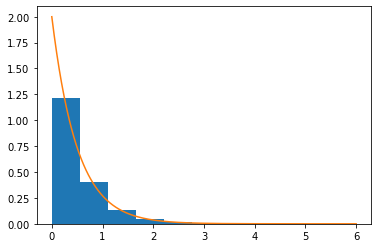

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma

def prob8(lamb, n):
    
    sample = -np.log(np.random.uniform(0, 1, n)) / lamb
    
    return lambda x: lamb * np.exp(-lamb * x), sample
    

domain = np.linspace(0, 6, 500)

func, points = prob8(2, 10**5)

fig, axs = plt.subplots(1, 1)

axs.hist(points, density=True)
axs.plot(dom, func(domain))

plt.show()




# Problem 7.9

(i) 
\begin{equation}
y = \frac{1}{1+e^{-x}} \implies \frac{1}{y} = 1 + e^{-x} \implies \frac{1}{y} - 1 = e^{-x} \implies
\end{equation}
Which gives the inverse as
\begin{equation}
F^{-1}(y) = -(ln\frac{1}{y} - 1)
\end{equation}
(ii) and (iii) below

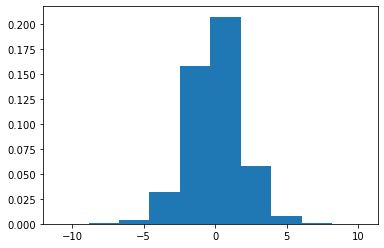

mean: -0.004142769468906185
variance: 3.262500649390709


In [38]:
sample = np.random.uniform(0,1, n)

logistic =  -1 *np.log((1/sample)-1)

plt.hist(logistic, density=True)
plt.show()

mean = (1/n) * sum(logistic)
variance = (1/(n-1)) * sum((logistic - mean)**2)

print('mean:', mean)
print('variance:', variance)


# Problem 7.11

(i) In order to minimize $m$ we need to maximize the function $e^{-x^2-x^3}/e^{-x}$ on the interval $[0,\infty)$. So taking the derivative gives us
\begin{equation}
e^{-x^2-x^3+x}(-2x-3x^2+1)
\end{equation}
setting it equal to zero we get that the function is maximized at $x=1/3$. Pluggin that back into our original equation we see that the minimum of $m$ is $m = e^{5/27}$.


(ii)
\begin{equation}
f_P(x) \leq M f_Q(x) \implies \frac{1}{Z}e^{-x^2-x^3} \leq M (\frac{e^{-x}}{\Gamma(1,1)})
\end{equation}
\begin{equation}
\implies M = \frac{m}{Z}
\end{equation}
We can compute the desired quantint without computing Z
\begin{equation}
\frac{f_P(z)}{Mf_Q(x)} = \frac{\frac{1}{Z}e^{-x^2-x^3}}{\frac{m}{Z}f_Q(x)} = \frac{e^{-x^2-x^3}}{e^{5/27}f_Q(x)}
\end{equation}
(iii) and (iv) below

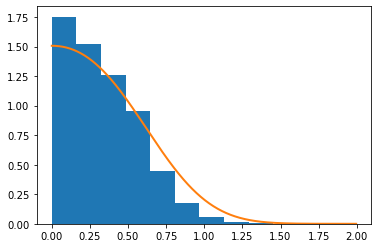

In [39]:

def rej_sampler(n):
    
    _, z = prob8(1, n)
    u = np.random.uniform(0,1, n)
    
    accepted = [z[i] for i in range(n) if u[i]<= np.exp(-(z[i]**2) - (z[i]**3))/ (np.exp(5/27.) * z[i])]
    
    return accepted


Z = 0.663711
x = np.linspace(0, 2, num = 500, endpoint=False)
gamma = ((1 / Z) * np.exp(-x**2 - x**3))
plt.hist(rej_sampler(10**5), density = True)
plt.plot(x, gamma, "-", lw =2)
plt.show()
    

    


    
    